In [28]:
class AdalineGD(object):
    """Adaptive Linear Neuron Classifier"""
    def __init__(self, eta = 0.01, epochs = 10, random_seed = 1):
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed
        
    def fit(self, X, y):
        np.random.seed(self.random_seed)
        # w size is increased by one for bias
        self.w = np.random.random(size = X.shape[1] + 1)
        
        self.maxy = y.max()
        self.miny = y.min()
        
        self.cost_ = []
        self.w_ = np.array([self.w])
        
        for i in range(self.epochs):
            Z = self.net_input(X)
            yhat = self.activation(Z)
            errors = (y - yhat)
            self.w[1:] += self.eta * np.dot(errors, X)
            self.w[0] += self.eta * np.sum(errors)
            cost = 0.5 * np.sum(errors**2)
            self.cost_.append(cost)
            self.w_ = np.vstack([self.w_, self.w])
        return self
    
    def net_input(self, X):
        z = np.dot(X, self.w[1:]) + self.w[0]
        return z
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        mid = (self.maxy + self.miny) / 2
        Z = self.net_input(X)
        yhat = self.activation(Z)
        return np.where(yhat > mid, self.maxy, self.miny)

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/'
                'ml/machine-learning-databases/'
                'iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


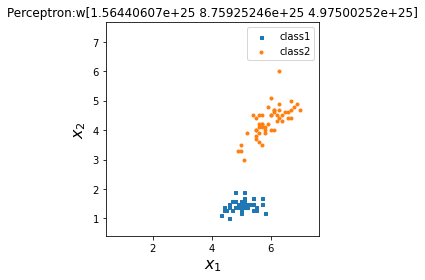

In [8]:
import joy
X, y = joy.iris_data()
ada = AdalineGD(epochs=10, eta=0.1)
ada.fit(X,y)
joy.plot_xyw(X,y, ada.w)

Text(0, 0.5, 'log(Sum-squared-error)')

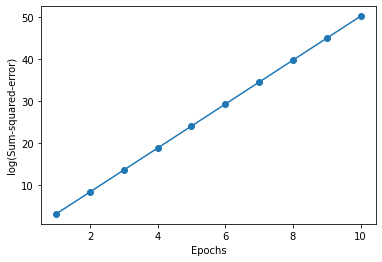

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')

Text(0, 0.5, 'log(Sum-squared-error)')

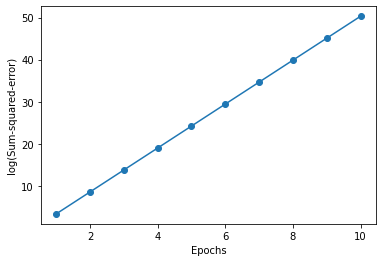

In [11]:
X, y = joy.iris_data()
ada = AdalineGD(epochs=10, eta=0.1)
ada.fit(X,y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')

Text(0, 0.5, 'log(Sum-squared-error)')

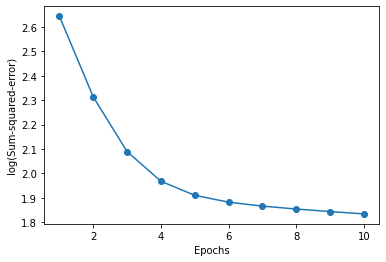

In [12]:
X, y = joy.iris_data()
ada = AdalineGD(epochs=10, eta=0.0001)
ada.fit(X,y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')

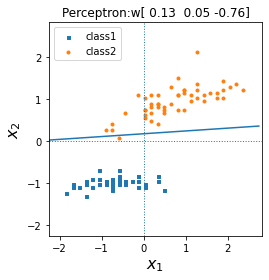

In [29]:
import joy
Xstd, y = joy.iris_data(standardized=True)
ada = AdalineGD(epochs=10, eta=0.001)
ada.fit(Xstd,y)
joy.plot_xyw(Xstd, y, ada.w)

In [30]:
#%%writefile code/AdalineGD_Momentum.py
# Implementation of  Widrow's Adaptive Linear classifier algorithm
# Author: idebtor@gmail.com
# 2018.03.21 - Creation

class AdalineGD_Momentum(object):
    """ADAptive LInear NEuron classifier.
    Parameters
        eta: float, Learning rate (between 0.0 and 1.0)
        epochs: int, Passes over the training dataset.
        random_seed : int, random funtion seed for reproducibility

    Attributes
        w_ : 1d-array, Weights after fitting.
        cost_ : list, Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, epochs=10, random_seed=1):
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed

    def fit(self, X, y):
        """ Fit training data.
        Parameters
            X: numpy.ndarray, shape=(n_samples, m_features), 
            y: class label, array-like, shape = (n_samples, )
        Returns
            self : object
        """            
        np.random.seed(self.random_seed)
        self.w = np.random.random(size=X.shape[1] + 1)
            
        self.maxy, self.miny = y.max(), y.min()
        self.cost_ = []
        self.w_ = np.array([self.w])
        
        """Momentum"""
        self.v1 = np.zeros_like(self.w[1:])
        self.v2 = np.zeros_like(self.w[0])
        gamma = 0.5

        for i in range(self.epochs):
            yhat = self.activation(self.net_input(X))
            errors = (y - yhat)
            
            self.v1 = gamma * self.v1 + self.eta * np.dot(errors, X)
            self.v2 = gamma * self.v2 + self.eta * np.sum(errors)
            
            self.w[1:] += self.v1 #self.eta * np.dot(errors, X)
            self.w[0] += self.v2 #self.eta * np.sum(errors)
            cost = 0.5 * np.sum(errors**2)
            self.cost_.append(cost)
            self.w_ = np.vstack([self.w_, self.w]) 
        return self

    def net_input(self, X):            
        """Compute the value of z, net input  """
        return np.dot(X, self.w[1:]) + self.w[0]

    def activation(self, X):  
        """Identity activation function: """
        return X

    def predict(self, X):      
        """Predict the class label with  """
        mid = (self.maxy + self.miny) / 2
        Z = self.net_input(X)
        yhat = self.activation(Z)
        return np.where(yhat > mid, self.maxy, self.miny)

In [31]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [34]:
import numpy as np
g = lambda x : 1 / (1 + np.exp(-x))
x = np.array([1, 0])

# feed forward propagation
W1 = np.array([[0.1, 0.4], [0.2, 0.2], [0.3, 0.0]])
z1 = np.dot(W1, x)
a1 = g(z1)
W2 = np.array([[0.5, 0.3, 0.4], [0.3, 0.2, 0.1]])
z2 = np.dot(W2, a1)
yhat = g(z2)
print('yhat=', yhat)

# error backpropagation
y = np.array([1, 1])
E2 = y - yhat
E1 = np.dot(W2.T, E2)
#print('E1=', E1)

yhat= [0.6586349  0.58051912]


In [36]:
def relu(x):
    return np.maximum(0, x)

In [39]:
import numpy as np
g = lambda x : relu(x)
x = np.array([1, 0])

# feed forward propagation
W1 = np.array([[0.1, 0.4], [0.2, 0.2], [0.3, 0.0]])
z1 = np.dot(W1, x)
a1 = g(z1)
W2 = np.array([[0.5, 0.3, 0.4], [0.3, 0.2, 0.1]])
z2 = np.dot(W2, a1)
yhat = g(z2)
print('yhat=', yhat)

# error backpropagation
y = np.array([1, 1])
E2 = y - yhat
print('E2=', E2)
E1 = np.dot(W2.T, E2)
print('E1=', E1)

yhat= [0.23 0.1 ]
E2= [0.77 0.9 ]
E1= [0.655 0.411 0.398]
